# 📘 Para-Procesimi i të Dhënave për Analizë
## Tema: Analiza e të dhënave të shitjeve (Superstore Dataset)

Ky notebook përmban hapat e detajuar të para-procesimit për dataset-in **Superstore**.
Procesi përfshin:
- Ngarkimin dhe inspektimin e të dhënave
- Trajtimin e tipeve të dhënave dhe vlerave të zbrazëta
- Pastrimin, agregimin dhe mostrimin
- Diskretizimin, binarizimin dhe transformimet
- Reduktimin e dimensioneve me PCA

**👩‍🎓 Studentja:** Anjeza Sfishta  <br>
**📚 Lënda:** Përgatitja dhe vizualizimi i të dhënave  

## 🧩 Importimi i librarive
Në këtë seksion importojmë libraritë kryesore që do të përdorim gjatë para-procesimit.


In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Binarizer, KBinsDiscretizer
from sklearn.decomposition import PCA
plt.rcParams['font.family'] = 'DejaVu Sans'  # Font i paracaktuar dhe Unicode-kompatibil

print('Pandas version:', pd.__version__)
print('Seaborn version:', sns.__version__)

Pandas version: 2.2.2
Seaborn version: 0.13.2


## 📥 Ngarkimi i të dhënave
Lexojmë dataset-in dhe shikojmë rreshtat e parë për të kuptuar strukturën e tij.


In [141]:
df = pd.read_csv('superstore.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## 🔍 Inspektimi dhe cilësia e të dhënave
Analizojmë tipet, mungesat dhe statistikat për të vlerësuar cilësinë e dataset-it.


In [142]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

## 🧹 Pastrimi i të dhënave
Heqim duplikatet dhe rreshtat me vlera të zbrazëta, si dhe konvertojmë kolonat e datës në formatin e duhur.


In [143]:
df = df.drop_duplicates()
#df = df.dropna()
for col in ['Sales']:
    df[col] = df[col].fillna(df[col].median())
    
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

invalid_dates = df[df['Order Date'].isna() | df['Ship Date'].isna()]
print(f"Rreshta me data të pavlefshme: {len(invalid_dates)}")



Rreshta me data të pavlefshme: 7124


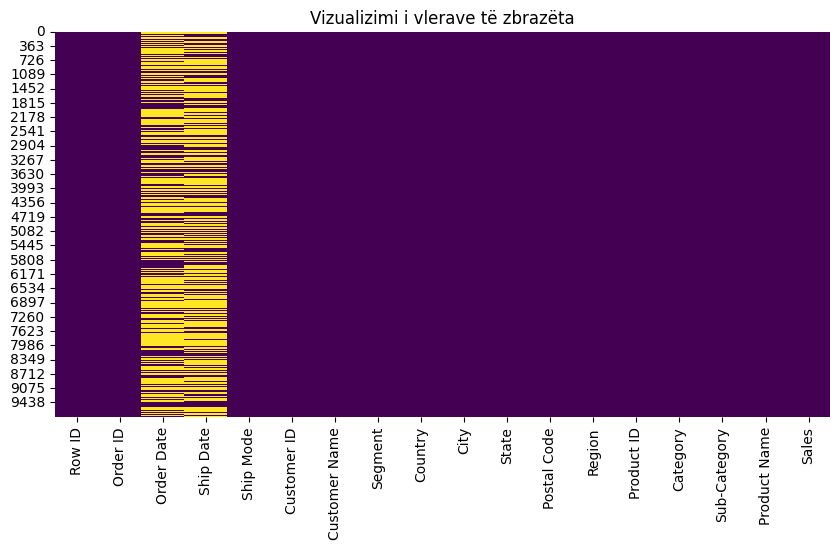

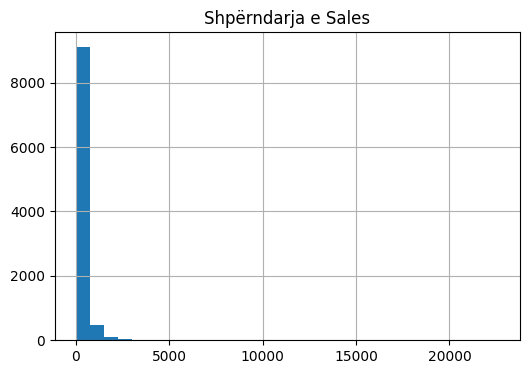

In [144]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Vizualizimi i vlerave të zbrazëta')
plt.show()

df[['Sales']].hist(bins=30, figsize=(6,4))
plt.title('Shpërndarja e Sales')
plt.show()

In [145]:
# Heq rreshtat ku datat janë NaT
df = df.dropna(subset=['Order Date', 'Ship Date'])
print(f"Numri i rreshtave pas heqjes së datave të pavlefshme: {len(df)}")


print("✅ Të dhënat u pastruan dhe datat u konvertuan me sukses!")

Numri i rreshtave pas heqjes së datave të pavlefshme: 2676
✅ Të dhënat u pastruan dhe datat u konvertuan me sukses!


## ⚙️ Diskretizimi, Binarizimi dhe Standardizimi
Kryejmë:
- **Diskretizimin** e kolonës `Sales` në 4 intervale  
- **Binarizimin** e kolonës `Profit` për të ndarë fitimet nga humbjet  
- **Standardizimin** e kolonave numerike për t’i sjellë në një shkallë të përbashkët


In [146]:
# Diskretizimi i kolonës 'Sales' në 4 intervale
disc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
df['Sales_binned'] = disc.fit_transform(df[['Sales']])
print("Kufijtë e intervaleve për Sales:", disc.bin_edges_)


# Binarizimi i kolonës 'Sales' sipas mesatares (1 = Shitje e lartë, 0 = Shitje e ulët)
threshold = df['Sales'].mean()
binarizer = Binarizer(threshold=threshold)
df['Sales_binary'] = binarizer.fit_transform(df[['Sales']])

# Standardizimi i kolonave numerike
scaler = StandardScaler()
df[['Sales']] = scaler.fit_transform(df[['Sales']])

print("✅ Diskretizimi, binarizimi dhe standardizimi u kryen me sukses!")
df[['Sales', 'Sales_binned', 'Sales_binary']].head()


Kufijtë e intervaleve për Sales: [array([5.560000e-01, 1.793500e+01, 5.824000e+01, 2.011340e+02,
        1.749995e+04])                                         ]
✅ Diskretizimi, binarizimi dhe standardizimi u kryen me sukses!


,Sales,Sales_binned,Sales_binary
0,0.048399,3.0,1.0
1,0.792189,3.0,1.0
13,0.279484,3.0,1.0
35,1.370794,3.0,1.0
36,-0.064029,2.0,0.0


## 🔗 Correlation Matrix për kolonat numerike


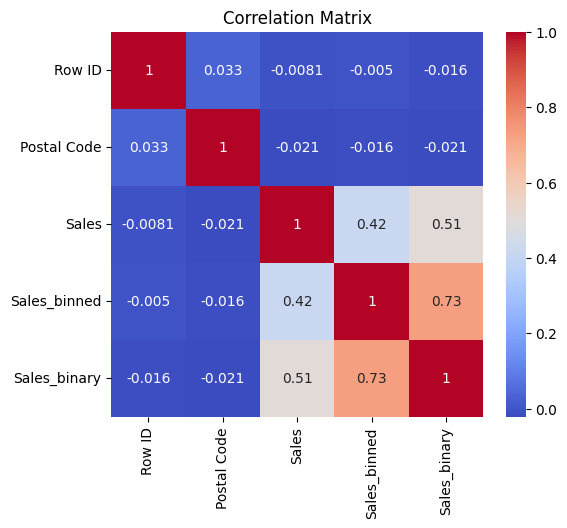

In [147]:
# Gjej kolonat numerike automatikisht
num_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(6,5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## 🎯 Reduktimi i dimensioneve me PCA
Përdorim **PCA (Principal Component Analysis)** për të reduktuar dimensionet e të dhënave dhe për të vizualizuar strukturën e tyre.


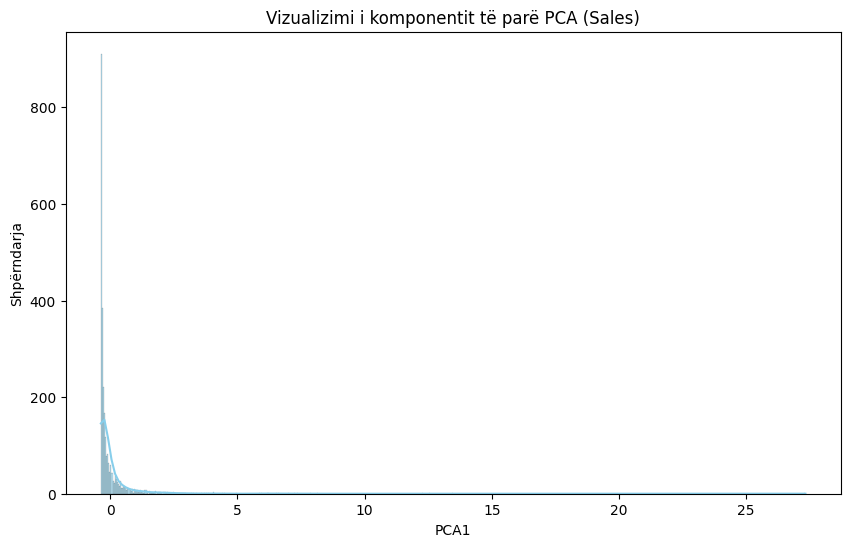

Varianca e kapur nga PCA1: 1.00


In [148]:
pca = PCA(n_components=1)
pca_data = pca.fit_transform(df[['Sales']])
df['PCA1'] = pca_data[:, 0]

plt.figure(figsize=(10,6))
sns.histplot(df['PCA1'], kde=True, color='skyblue', alpha=0.6)
plt.title('Vizualizimi i komponentit të parë PCA (Sales)')
plt.xlabel('PCA1')
plt.ylabel('Shpërndarja')
plt.show()

explained_variance = pca.explained_variance_ratio_[0]
print(f"Varianca e kapur nga PCA1: {explained_variance:.2f}")

## 🧠 Krijimi i veçorive të reja
Shtohet veçoria e re `Delivery_Days` që tregon kohën e dërgesës për çdo porosi.


In [149]:
df['Delivery_Days'] = (df['Ship Date'] - df['Order Date']).dt.days
df[['Order Date', 'Ship Date', 'Delivery_Days']].head()

,Order Date,Ship Date,Delivery_Days
0,2017-08-11,2017-11-11,92
1,2017-08-11,2017-11-11,92
13,2017-05-12,2017-10-12,153
35,2017-08-12,2017-10-12,61
36,2017-08-12,2017-10-12,61


## 📊 Mostrim dhe Agregim i të Dhënave

Në këtë seksion do të kryejmë disa analiza përmbledhëse duke përdorur funksione të tilla si:
- `groupby()` për të grupuar të dhënat sipas kategorive ose rajoneve
- `agg()` për të llogaritur mesatare, total dhe numërime
- `sample()` për të marrë mostra të rastësishme nga dataset-i

Këto analiza ndihmojnë për të kuptuar shpërndarjen e shitjeve dhe fitimeve sipas rajonit, kategorisë ose segmentit të klientit.


🧩 Shembuj Praktikë

1. Mostrim i rastësishëm (5 rreshta)

In [150]:
print("Mostër e rastësishme nga dataset-i:")
display(df.sample(5))


Mostër e rastësishme nga dataset-i:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Sales_binned,Sales_binary,PCA1,Delivery_Days
6039,6040,CA-2017-131205,2017-04-09,2017-08-09,Standard Class,AA-10645,Anna Andreadi,Consumer,United States,Georgetown,...,South,OFF-AR-10003469,Office Supplies,Art,Nontoxic Chalk,-0.357823,0.0,0.0,-0.357823,122
7162,7163,CA-2015-138709,2015-04-07,2015-09-07,Standard Class,MS-17770,Maxwell Schwartz,Consumer,United States,Richmond,...,South,OFF-BI-10000145,Office Supplies,Binders,Zipper Ring Binder Pockets,-0.341491,0.0,0.0,-0.341491,153
3878,3879,CA-2015-151001,2015-05-04,2015-07-04,First Class,JG-15805,John Grady,Corporate,United States,Decatur,...,Central,OFF-ST-10003455,Office Supplies,Storage,"Tenex File Box, Personal Filing Tote with Lid,...",-0.287632,1.0,0.0,-0.287632,61
2352,2353,CA-2018-109701,2018-02-12,2018-03-12,Same Day,AM-10360,Alice McCarthy,Corporate,United States,Los Angeles,...,West,OFF-AR-10001868,Office Supplies,Art,Prang Dustless Chalk Sticks,-0.350227,0.0,0.0,-0.350227,28
9171,9172,US-2017-155768,2017-01-12,2017-01-12,Same Day,LB-16795,Laurel Beltran,Home Office,United States,Oxnard,...,West,OFF-PA-10001357,Office Supplies,Paper,Xerox 1886,-0.290373,1.0,0.0,-0.290373,0


2. Mesatarja e shitjeve dhe fitimit sipas Rajonit

In [151]:
print("\nMesatarja e shitjeve dhe fitimit sipas Rajonit:")
region_summary = df.groupby('Region')[['Sales']].mean().reset_index()
display(region_summary)


Mesatarja e shitjeve dhe fitimit sipas Rajonit:


,Region,Sales
0,Central,0.000631
1,East,-0.005645
2,South,0.030613
3,West,-0.012253


3. Totali i shitjeve dhe fitimit sipas Kategorisë së Produktit

In [152]:
print("\nTotali i shitjeve dhe fitimit sipas Kategorisë së Produktit:")
category_summary = df.groupby('Category')[['Sales',]].sum().reset_index()
display(category_summary)


Totali i shitjeve dhe fitimit sipas Kategorisë së Produktit:


,Category,Sales
0,Furniture,105.714817
1,Office Supplies,-318.252309
2,Technology,212.537493


4. Numri i porosive sipas Segmentit të Klientit

In [153]:
print("\nNumri i porosive sipas Segmentit të Klientit:")
segment_orders = df['Segment'].value_counts().reset_index()
segment_orders.columns = ['Segment', 'Numri i Porosive']
display(segment_orders)


Numri i porosive sipas Segmentit të Klientit:


,Segment,Numri i Porosive
0,Consumer,1389
1,Corporate,778
2,Home Office,509


5. Vizualizim grafik i shitjeve mesatare sipas Rajonit

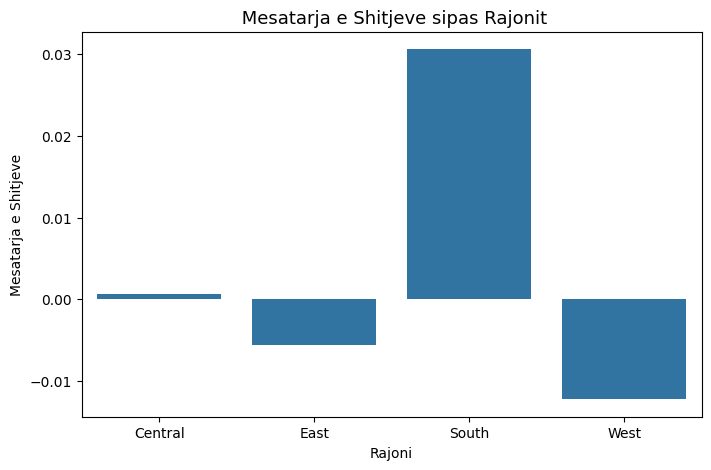

In [154]:
plt.figure(figsize=(8,5))
sns.barplot(data=region_summary, x='Region', y='Sales')
plt.title(" Mesatarja e Shitjeve sipas Rajonit", fontsize=13)
plt.xlabel("Rajoni")
plt.ylabel("Mesatarja e Shitjeve")
plt.show()

## 📈 Analiza shtesë e shitjeve sipas kategorive, dërgesave dhe kohës


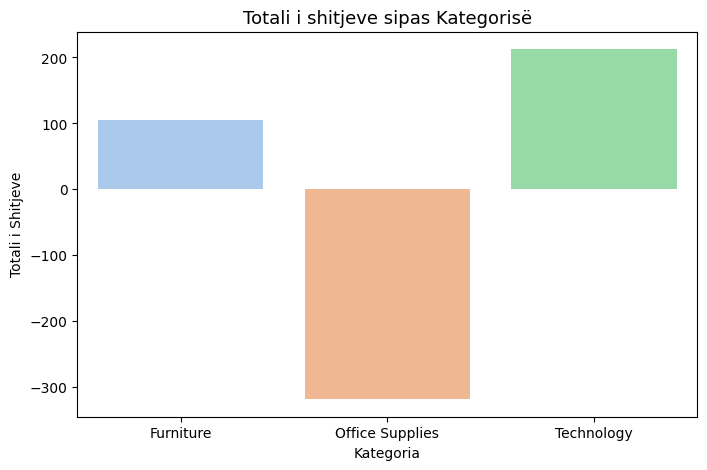

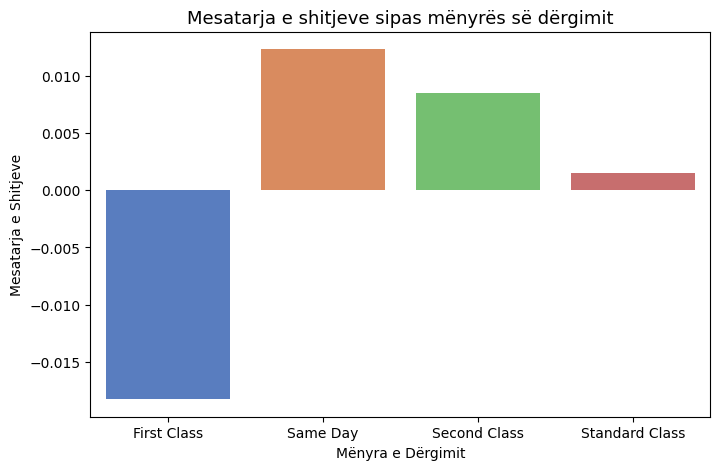

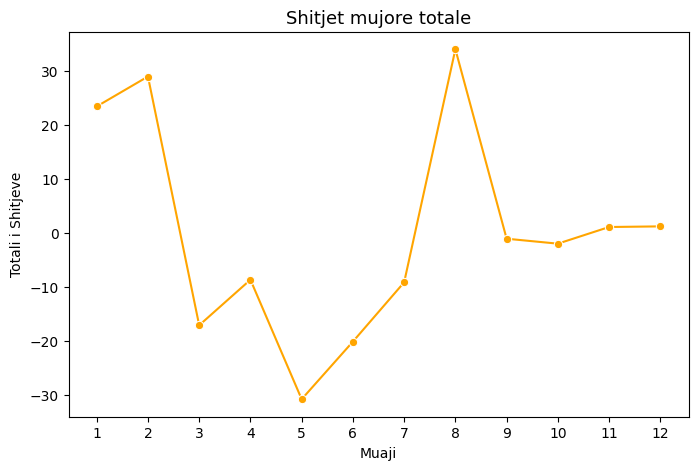

In [155]:
# 📊 Shitjet sipas kategorisë
plt.figure(figsize=(8,5))
sns.barplot(data=category_summary, x='Category', y='Sales', hue='Category', palette='pastel', legend=False)
plt.title('Totali i shitjeve sipas Kategorisë', fontsize=13)
plt.xlabel('Kategoria')
plt.ylabel('Totali i Shitjeve')
plt.show()

# 📦 Shitjet sipas mënyrës së dërgimit
shipmode_sales = df.groupby('Ship Mode')['Sales'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=shipmode_sales, x='Ship Mode', y='Sales', hue='Ship Mode', palette='muted', legend=False)
plt.title('Mesatarja e shitjeve sipas mënyrës së dërgimit', fontsize=13)
plt.xlabel('Mënyra e Dërgimit')
plt.ylabel('Mesatarja e Shitjeve')
plt.show()

# 📆 Shto kolonat për muajin dhe vitin e porosisë
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Year'] = df['Order Date'].dt.year

# 📈 Shitjet sipas muajit
monthly_sales = df.groupby('Order_Month')['Sales'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(data=monthly_sales, x='Order_Month', y='Sales', marker='o', color='orange')
plt.title('Shitjet mujore totale', fontsize=13)
plt.xlabel('Muaji')
plt.ylabel('Totali i Shitjeve')
plt.xticks(range(1,13))
plt.show()


## 🏁 Përmbledhje përfundimtare
Këtu përmblidhen të gjithë hapat e realizuar gjatë procesit të para-procesimit.  
Dataset-i përfundimtar u ruajt për përdorim të mëtejshëm në analizë apo modelim.


In [156]:
print("✅ Para-procesimi u përfundua me sukses!\n")
print("U kryen këto hapa:")
print("1. Ngarkimi dhe inspektimi i të dhënave")
print("2. Pastrimi dhe konvertimi i tipeve")
print("3. Diskretizimi dhe binarizimi")
print("4. Standardizimi dhe PCA")
print("5. Krijimi i veçorive të reja")

df.to_csv("cleaned_superstore.csv", index=False)
print("\n💾 Të dhënat e pastruara u ruajtën si 'cleaned_superstore.csv'")


✅ Para-procesimi u përfundua me sukses!

U kryen këto hapa:
1. Ngarkimi dhe inspektimi i të dhënave
2. Pastrimi dhe konvertimi i tipeve
3. Diskretizimi dhe binarizimi
4. Standardizimi dhe PCA
5. Krijimi i veçorive të reja

💾 Të dhënat e pastruara u ruajtën si 'cleaned_superstore.csv'
